In [52]:
!git clone https://github.com/nathan-tw/anserini_wt2g.git

Cloning into 'anserini_wt2g'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 51 (delta 24), reused 33 (delta 15), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [110]:
!ls -al anserini_wt2g/trec_eval/

total 52
drwxr-xr-x 2 root root 4096 Apr 30 06:34 .
drwxr-xr-x 6 root root 4096 Apr 30 06:34 ..
-rw-r--r-- 1 root root 1012 Apr 30 06:34 bm25+mr3_unstemmed.txt
-rw-r--r-- 1 root root 1013 Apr 30 06:34 bm25prf_stemmed.txt
-rw-r--r-- 1 root root 1013 Apr 30 06:34 bm25prf_unstemmed.txt
-rw-r--r-- 1 root root 1013 Apr 30 06:34 bm25+rm3_stemmed.txt
-rw-r--r-- 1 root root 1013 Apr 30 06:34 bm25_stemmed.txt
-rw-r--r-- 1 root root 1012 Apr 30 06:34 bm25_unstemmed.txt
-rw-r--r-- 1 root root 1013 Apr 30 06:34 qld_stemmed.txt
-rw-r--r-- 1 root root 1012 Apr 30 06:34 qld_unstemmed.txt
-rw-r--r-- 1 root root 1013 Apr 30 06:34 qljm0.5_stemmed.txt
-rw-r--r-- 1 root root 1013 Apr 30 06:34 qljm_stemmed.txt
-rw-r--r-- 1 root root 1012 Apr 30 06:34 qljm_unstemmed.txt


In [0]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
import os
path = 'anserini_wt2g/trec_eval'
filePaths = [os.path.join(path,fileName) for fileName in os.listdir(path)]

In [0]:
ele_iprec_list = []
for filePath in filePaths:
  file = open(filePath, 'r').read()
  token = file.split()
  title = [v for i, v in enumerate(token) if i%3==0]
  value = [v for i, v in enumerate(token) if i%3==2]
  ele_iprec = pd.DataFrame({'index':title, 'value':value})[10:21].astype({'value':'float'})
  ele_iprec_list.append(ele_iprec)

In [113]:
os.listdir(path)

['bm25prf_stemmed.txt',
 'bm25+rm3_stemmed.txt',
 'bm25prf_unstemmed.txt',
 'qld_stemmed.txt',
 'bm25_stemmed.txt',
 'qljm_stemmed.txt',
 'bm25+mr3_unstemmed.txt',
 'qld_unstemmed.txt',
 'bm25_unstemmed.txt',
 'qljm_unstemmed.txt',
 'qljm0.5_stemmed.txt']

In [0]:
qld = ele_iprec_list[3]

In [0]:
def A(lst):
  sort = [int(each[-13]) for each in filePaths]
  for i, v in enumerate(ele_iprec_list):
    for j, k in enumerate(sort):
      if j==i:
        v['lambda']=k
  qljm = pd.concat(ele_iprec_list)[['value',	'lambda']]
  qljm = qljm.sort_values(by='lambda').set_index('lambda')
  return qljm

In [0]:
qljm = A(ele_iprec_list)

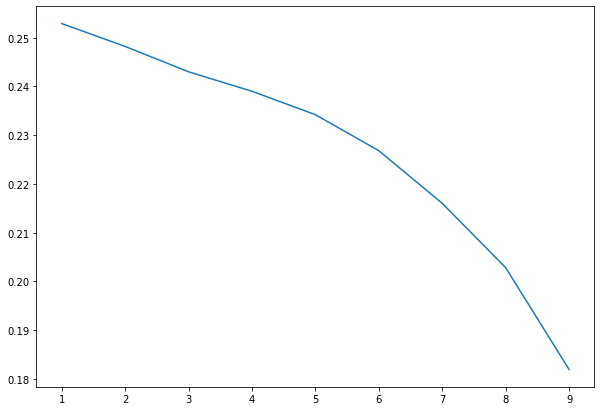

In [101]:
plt.figure(figsize=(10,7))
plt.plot(qljm)

,index,value
10,iprec_at_recall_0.00,0.7492
11,iprec_at_recall_0.10,0.6007
12,iprec_at_recall_0.20,0.5072
13,iprec_at_recall_0.30,0.4110
14,iprec_at_recall_0.40,0.3547
15,iprec_at_recall_0.50,0.3131
16,iprec_at_recall_0.60,0.2341
17,iprec_at_recall_0.70,0.1819
18,iprec_at_recall_0.80,0.1362
19,iprec_at_recall_0.90,0.0918


In [117]:
qljm1

,index,value
10,iprec_at_recall_0.00,0.6075
11,iprec_at_recall_0.10,0.4963
12,iprec_at_recall_0.20,0.4151
13,iprec_at_recall_0.30,0.3386
14,iprec_at_recall_0.40,0.2995
15,iprec_at_recall_0.50,0.2551
16,iprec_at_recall_0.60,0.2101
17,iprec_at_recall_0.70,0.1698
18,iprec_at_recall_0.80,0.1266
19,iprec_at_recall_0.90,0.0863


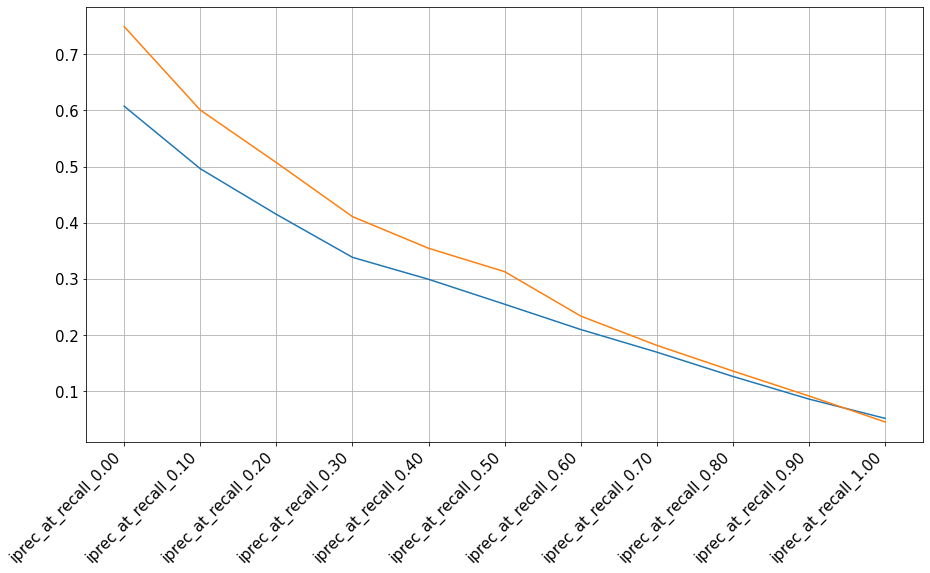

In [119]:
y = qld.set_index('index')
x = qljm1.set_index('index')
z = ele_iprec_list[6].set_index('index')
i = ele_iprec_list[3].set_index('index')

plt.figure(figsize=(15,8))
plt.xticks(rotation=45, size=15, ha='right')
plt.yticks(size=15)
plt.grid(True)

plt.plot(x)
#plt.plot(z)
plt.plot(y)
#plt.plot(i)

In [0]:
labelList = [name[:-4] for name in os.listdir(path)]

In [0]:
res = [ele_iprec_list[i].assign(c=labelList[i]).set_index('index') for i in range(10)]

In [0]:
res.sort(key = lambda x: x.value[2], reverse=True)

In [0]:
data = pd.concat(res)

In [0]:
data[data['c']=='bm25prf_stemmed']

,value,c
index,,
iprec_at_recall_0.00,0.6921,bm25prf_stemmed
iprec_at_recall_0.10,0.6390,bm25prf_stemmed
iprec_at_recall_0.20,0.5621,bm25prf_stemmed
iprec_at_recall_0.30,0.4718,bm25prf_stemmed
iprec_at_recall_0.40,0.4104,bm25prf_stemmed
iprec_at_recall_0.50,0.3679,bm25prf_stemmed
iprec_at_recall_0.60,0.3049,bm25prf_stemmed
iprec_at_recall_0.70,0.2366,bm25prf_stemmed
iprec_at_recall_0.80,0.1724,bm25prf_stemmed


In [0]:
mdf = pd.melt(data, id_vars=['c'], var_name=['Number'])

Text(0, 0.5, 'precision')

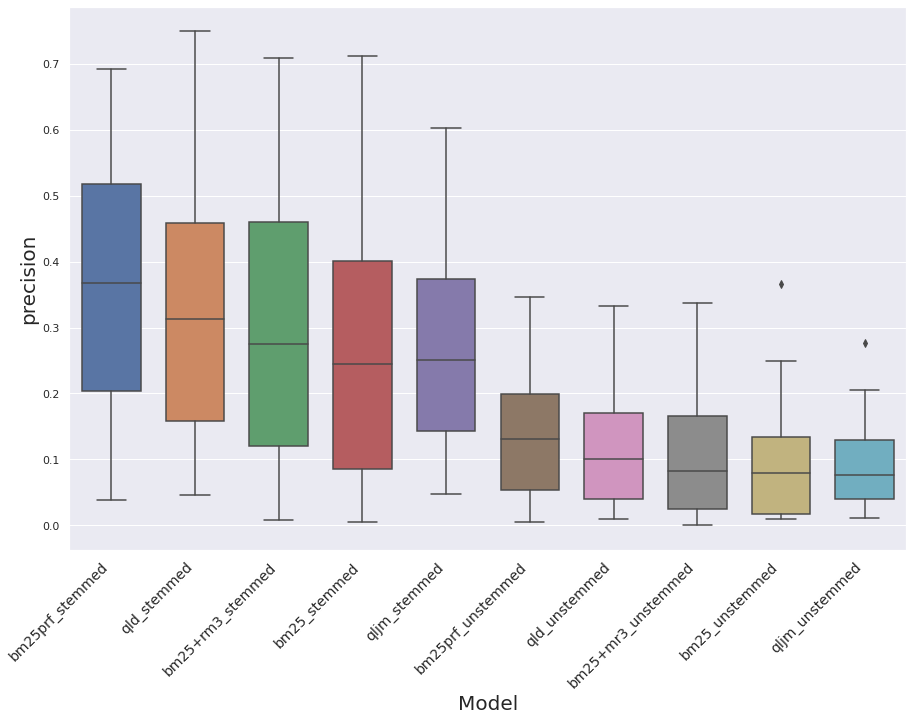

In [0]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.boxplot(x="c", y="value", data=mdf, width=0.7)  # RUN PLOT  
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
ax.set_xlabel("Model",fontsize=20)
ax.set_ylabel("precision",fontsize=20)